<a href="https://colab.research.google.com/github/ajayjai30/PREDICTION-OF-NEXT-NUMBER-USING-LSTM-MODEL/blob/main/Prediction_model_for_next_number_using_RNN_LSTM_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Here i am going to implement the LSTM model for predicting the next consecutive numbers.

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
from keras.layers import Dense,LSTM
from keras.models import Sequential
from keras import callbacks,regularizers
import matplotlib.pyplot as plt

Here i am creating a vector with 10 columns and 1000 rows for prediction of next number

In [ ]:
data=[[[(i+j)/1000]for i in range(10)] for j in range(1000)]

In [ ]:
data[:5]

[[[0.0],
  [0.001],
  [0.002],
  [0.003],
  [0.004],
  [0.005],
  [0.006],
  [0.007],
  [0.008],
  [0.009]],
 [[0.001],
  [0.002],
  [0.003],
  [0.004],
  [0.005],
  [0.006],
  [0.007],
  [0.008],
  [0.009],
  [0.01]],
 [[0.002],
  [0.003],
  [0.004],
  [0.005],
  [0.006],
  [0.007],
  [0.008],
  [0.009],
  [0.01],
  [0.011]],
 [[0.003],
  [0.004],
  [0.005],
  [0.006],
  [0.007],
  [0.008],
  [0.009],
  [0.01],
  [0.011],
  [0.012]],
 [[0.004],
  [0.005],
  [0.006],
  [0.007],
  [0.008],
  [0.009],
  [0.01],
  [0.011],
  [0.012],
  [0.013]]]

now i am creating a target set with the missing value conseqtively for each row like 0,1,2,3,4,5,6,7,8,9 for in first case 10 is the missing value

In [ ]:
target=[(i+10)/1000for i in range(1000)]

In [ ]:
target[:6]

[0.01, 0.011, 0.012, 0.013, 0.014, 0.015]

Now converting all the data's into float values becuase all ML models can perform better on floating values and also performing normalization so that the values lies between 0 and 1

In [ ]:
data=np.array(data,dtype=float)
target=np.array(target,dtype=float)

In [ ]:
data[0:1]

array([[[0.   ],
        [0.001],
        [0.002],
        [0.003],
        [0.004],
        [0.005],
        [0.006],
        [0.007],
        [0.008],
        [0.009]]])

Checking for shape of the data and target

In [ ]:
data.shape

(1000, 10, 1)

In [ ]:
target.shape

(1000,)

splitting the data as training and testing values

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(data,target,random_state=1,test_size=0.2,shuffle=True)

defining the model

In [ ]:
model=Sequential()

Here I added the LSTM layer with the sequential model
*  1 - at first represents the output predicted no of values
*  batch_input_shape - it is the input shape with three parametres
      *    None - represents the no of inputs (because it can be any no of inputs),since it represents the batch size
      *    5 - represents the length of input sequence
      *    1 - represents the no of sequences

In [ ]:
x_train.shape

(800, 10, 1)

In [ ]:
model.add(LSTM((1),batch_size=32,batch_input_shape=(None,10,1),return_sequences=False,kernel_regularizer=regularizers.l2(1e-5)))

Here I am compiling the model with optimization technique and loss function

In [ ]:
model.compile(optimizer='adam',metrics=['accuracy'],loss='mean_absolute_error')

Now fitting the model with the appropirate dataset producee above


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1)                 12        
                                                                 
Total params: 12 (48.00 Byte)
Trainable params: 12 (48.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
a=model.fit(x_train,y_train,batch_size=32,epochs=5000,validation_data=(x_test,y_test),verbose=1)

Streaming output truncated to the last 5000 lines.
25/25 [==============================] - 0s 12ms/step - loss: 0.0015 - accuracy: 0.0012 - val_loss: 0.0019 - val_accuracy: 0.0000e+00
Epoch 2502/5000
25/25 [==============================] - 0s 9ms/step - loss: 0.0016 - accuracy: 0.0012 - val_loss: 0.0016 - val_accuracy: 0.0000e+00
Epoch 2503/5000
25/25 [==============================] - 0s 7ms/step - loss: 0.0015 - accuracy: 0.0012 - val_loss: 0.0016 - val_accuracy: 0.0000e+00
Epoch 2504/5000
25/25 [==============================] - 0s 8ms/step - loss: 0.0015 - accuracy: 0.0012 - val_loss: 0.0016 - val_accuracy: 0.0000e+00
Epoch 2505/5000
25/25 [==============================] - 0s 7ms/step - loss: 0.0015 - accuracy: 0.0012 - val_loss: 0.0017 - val_accuracy: 0.0000e+00
Epoch 2506/5000
25/25 [==============================] - 0s 9ms/step - loss: 0.0015 - accuracy: 0.0012 - val_loss: 0.0016 - val_accuracy: 0.0000e+00
Epoch 2507/5000
25/25 [==============================] - 0s 8ms/step -

In [ ]:
result=model.predict(x_test)

7/7 [==============================] - 1s 3ms/step


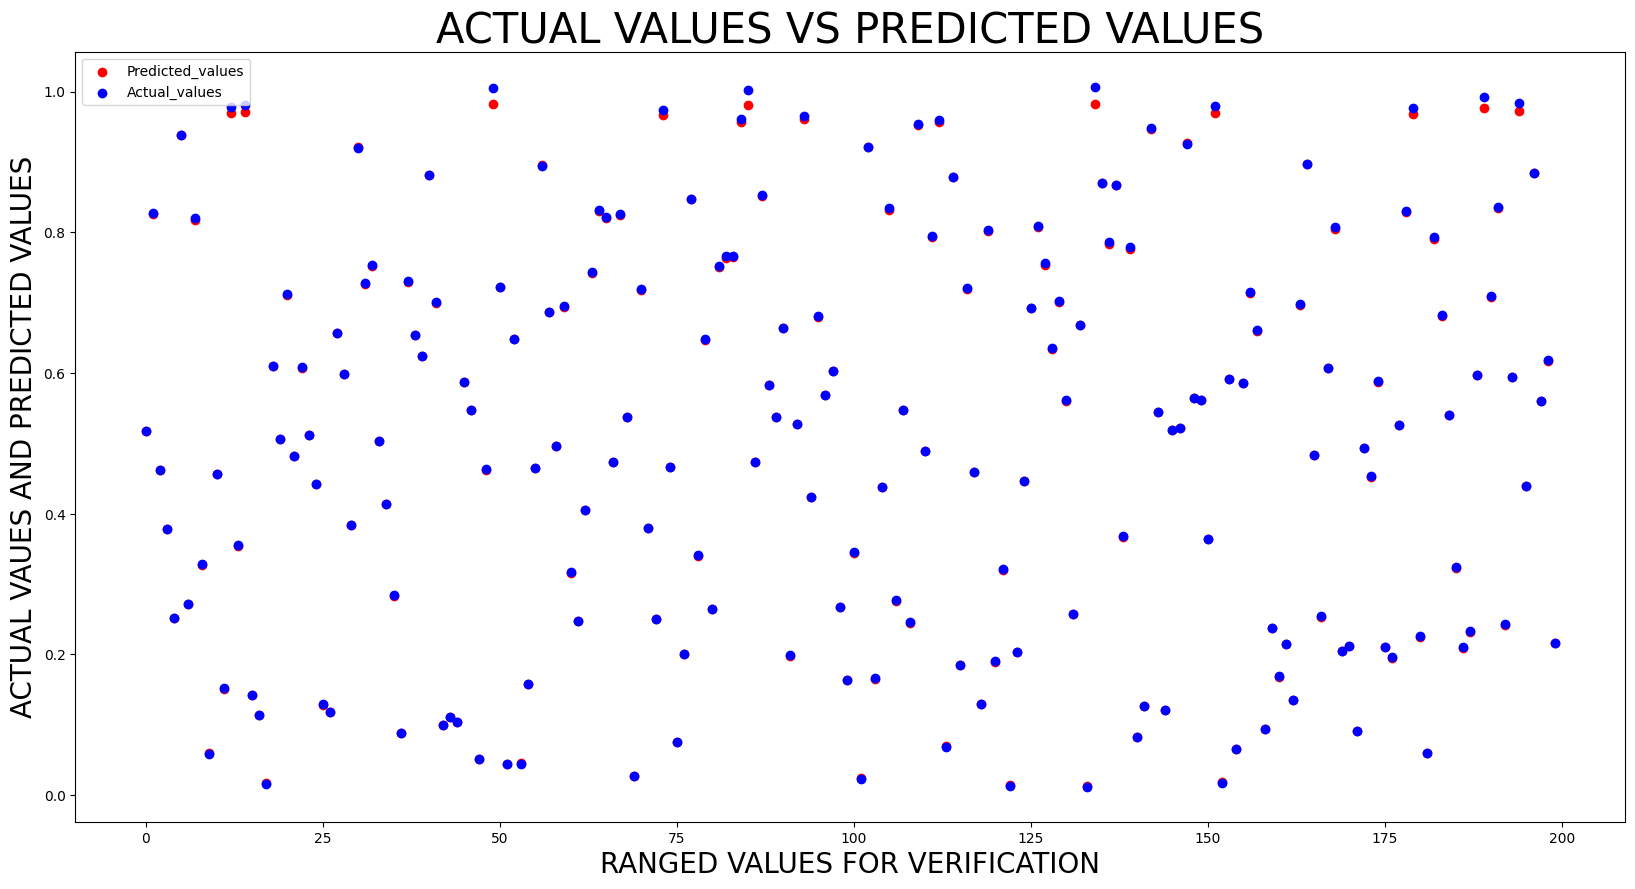

In [ ]:
plt.figure(figsize=(20,10))
plt.scatter(range(200),result,c='r')
plt.scatter(range(200),y_test,c='b')
plt.xlabel("RANGED VALUES FOR VERIFICATION",fontsize=20)
plt.ylabel("ACTUAL VAUES AND PREDICTED VALUES",fontsize=20)
plt.title("ACTUAL VALUES VS PREDICTED VALUES",fontsize=30)
plt.legend(['Predicted_values','Actual_values'])
plt.show()

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.model_selection import cross_val_score

In [ ]:
r2_score(result,y_test)

0.9998471543981228

In [ ]:
mean_absolute_error(y_test,result)

0.0013141737416759107

In [ ]:
#[[[(i+j)/1000]for i in range(3)]for j in range(1)]